In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [59]:
df = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/AptOnly/Dongdaemun_Gu_Only.csv")

In [60]:
dfInfo = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/Data_Analysis/Reference.csv", 
                     index_col=0)

In [61]:
df

,kaptCode,bjdCode,Household_Num,Begin_Date,Heating_Method,House_Type,Elec_Con,Elev_Num,Park_Above,Park_Below
0,A13007002,1123010200,435,20090205,개별난방,아파트,단일계약,11.0,13.0,426.0
1,A13070302,1123010200,210,20110428,개별난방,아파트,단일계약,2.0,0.0,215.0
2,A13007004,1123010200,772,19941014,개별난방,아파트,단일계약,15.0,270.0,178.0
3,A10028080,1123010200,311,20150313,개별난방,아파트,종합계약,16.0,0.0,337.0
4,A13070301,1123010200,844,20110428,개별난방,아파트,단일계약,24.0,0.0,1208.0
...,...,...,...,...,...,...,...,...,...,...
88,A13008001,1123011000,166,20081010,개별난방,아파트,종합계약,8.0,43.0,143.0
89,A13079402,1123011000,188,20000503,개별난방,아파트,단일계약,2.0,16.0,114.0
90,A13079403,1123011000,245,20001129,개별난방,아파트,단일계약,3.0,4.0,97.0
91,A13082805,1123011000,1378,20030709,개별난방,아파트,단일계약,33.0,159.0,1457.0


In [62]:
df.isnull().sum()

kaptCode          0
bjdCode           0
Household_Num     0
Begin_Date        0
Heating_Method    0
House_Type        0
Elec_Con          1
Elev_Num          1
Park_Above        1
Park_Below        1
dtype: int64

<AxesSubplot: >

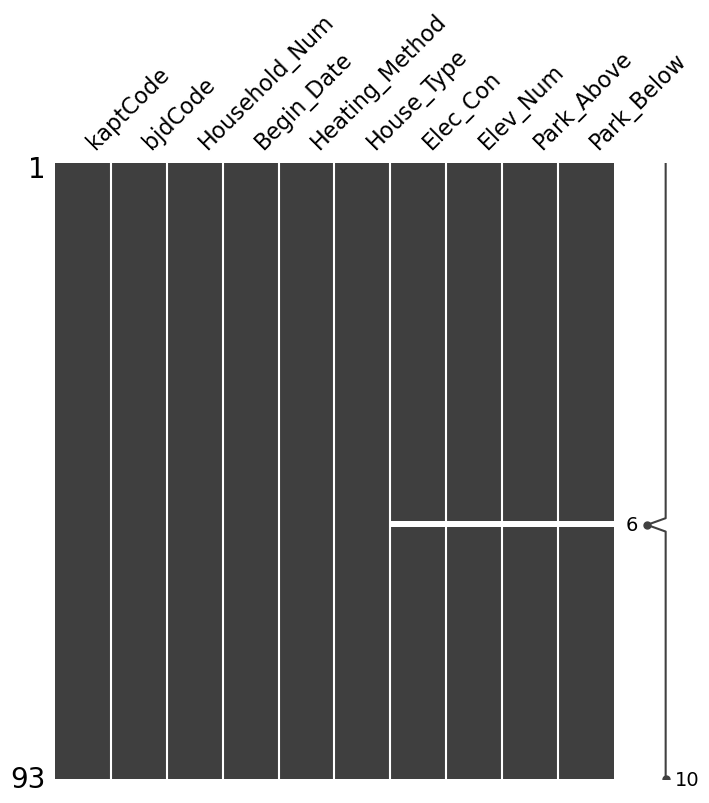

In [63]:
msno.matrix(df=df, figsize=(8, 8))

## Begin_Date

In [64]:
#null values
Begin_Date = df['Begin_Date']
print(f"There are {Begin_Date.isnull().sum()} null values, and they are located at \n{np.where(Begin_Date.isnull())[0]}")

There are 0 null values, and they are located at 
[]


In [65]:
#Drop the null values and change date values to datetime
Begin_Date = df['Begin_Date'].dropna()
Begin_Date = pd.to_datetime(Begin_Date, format = '%Y%m%d')
print(Begin_Date)

0    2009-02-05
1    2011-04-28
2    1994-10-14
3    2015-03-13
4    2011-04-28
        ...    
88   2008-10-10
89   2000-05-03
90   2000-11-29
91   2003-07-09
92   1997-12-30
Name: Begin_Date, Length: 93, dtype: datetime64[ns]


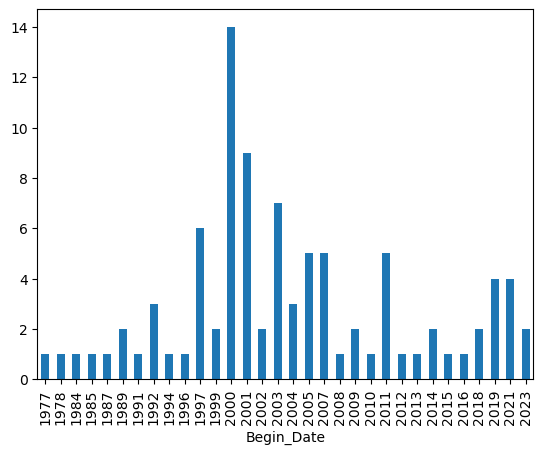

In [66]:
# distribution of years in Begin_Date
Begin_Date.groupby(Begin_Date.dt.year).count().plot(kind="bar")
plt.show()

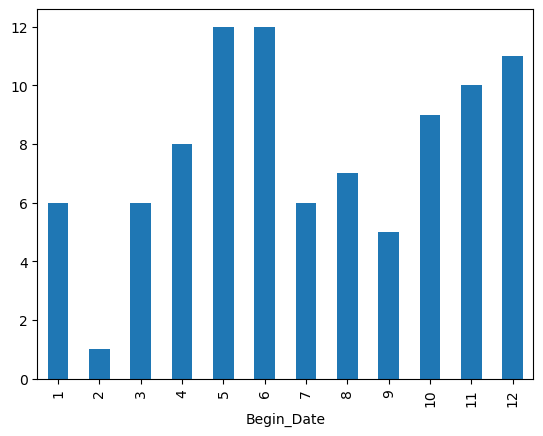

In [67]:
#Distribtion of months in Begin_Date(just for fun)
Begin_Date.groupby(Begin_Date.dt.month).count().plot(kind="bar")
plt.show()

## Household_Num

In [68]:
#1 null value
Household_Num = df['Household_Num']
print(f"There are {Household_Num.isnull().sum()} null values, and they are located at \n{np.where(Household_Num.isnull())[0]}")
display(Household_Num)

There are 0 null values, and they are located at 
[]


0      435
1      210
2      772
3      311
4      844
      ... 
88     166
89     188
90     245
91    1378
92     353
Name: Household_Num, Length: 93, dtype: int64

In [69]:
Household_Num = Household_Num.dropna()
Household_Num = Household_Num.astype('int16')

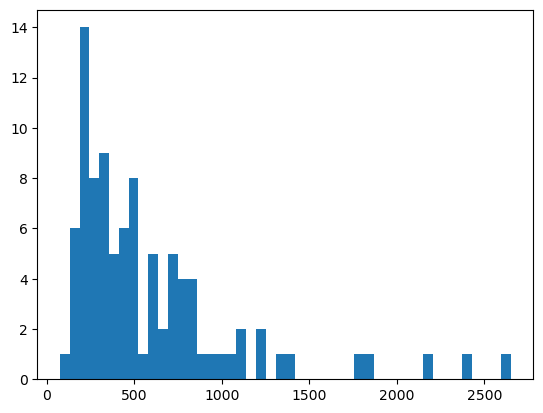

In [75]:
fig, ax = plt.subplots()
b = int(len(Household_Num)/2)
ax.hist(Household_Num, bins = b)
plt.show()

In [71]:
Household_Num.describe()

count      93.000000
mean      588.666667
std       487.900389
min        75.000000
25%       261.000000
50%       451.000000
75%       741.000000
max      2652.000000
Name: Household_Num, dtype: float64

In [72]:
def printApt (Column, df, dfInfo, maxmin = "max", ind= 0):
    if(maxmin == "max"):
        find = Column[Column == Column.max()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])
    elif(maxmin == "min"):
        find = Column[Column == Column.min()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])

In [73]:
printApt(Household_Num, df, dfInfo)

kaptCode           A13003007
bjdCode           1123010500
Household_Num           2652
Begin_Date          20141013
Heating_Method          개별난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                83.0
Park_Above               0.0
Park_Below            3190.0
Name: 42, dtype: object
     kaptCode Complex_Name
46  A13003007        래미안위브


## Heating_Method

In [22]:
# 4 null values
Heating_Method = df['Heating_Method']
print(f"There are {Heating_Method.isnull().sum()} null values, and they are located at \n{np.where(Heating_Method.isnull())[0]}")
display(Heating_Method)

There are 0 null values, and they are located at 
[]


0     개별난방
1     개별난방
2     개별난방
3     개별난방
4     개별난방
      ... 
88    개별난방
89    개별난방
90    개별난방
91    개별난방
92    개별난방
Name: Heating_Method, Length: 93, dtype: object

In [23]:
Heating_Method = Heating_Method.dropna()

In [24]:
int_HM = pd.factorize(Heating_Method)[0]
ind_HM = pd.factorize(Heating_Method)[1]
print(int_HM)
print(ind_HM)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Index(['개별난방', '개별난방+기타', '중앙난방'], dtype='object')


In [25]:
count_int_HM = pd.Series(int_HM).value_counts()
count_int_HM

0    87
2     4
1     2
dtype: int64

In [56]:
eng_ind_HM = ['Individual', 'Indiv + Other', 'Central']

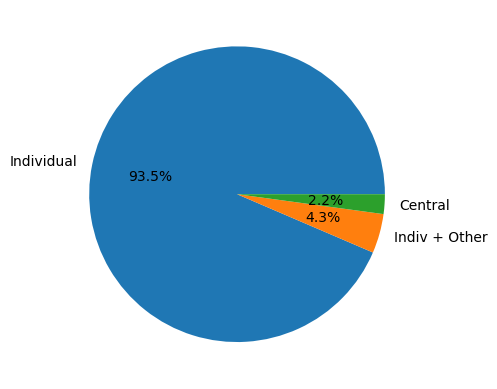

In [57]:
fig, ax = plt.subplots()
ax.pie(count_int_HM, labels=eng_ind_HM, autopct='%1.1f%%')
plt.show()

## Elev_Num; Elevator Number

In [28]:
Elev_Num = df['Elev_Num']
print(f"There are {Elev_Num.isnull().sum()} null values, and they are located at \n{np.where(Elev_Num.isnull())[0]}")

There are 1 null values, and they are located at 
[54]


In [29]:
Elev_Num = Elev_Num.dropna()
Elev_Num = Elev_Num.astype('int16')

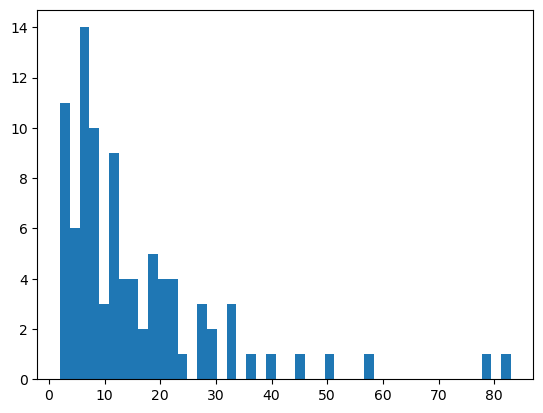

In [76]:
fig, ax = plt.subplots()
b = int(len(Elev_Num)/2)
ax.hist(Elev_Num, bins = b)
plt.show()

In [31]:
Elev_Num.describe()

count    92.000000
mean     15.586957
std      14.847320
min       2.000000
25%       7.000000
50%      11.000000
75%      20.000000
max      83.000000
Name: Elev_Num, dtype: float64

In [32]:
printApt(Elev_Num, df, dfInfo)

kaptCode           A13003007
bjdCode           1123010500
Household_Num           2652
Begin_Date          20141013
Heating_Method          개별난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                83.0
Park_Above               0.0
Park_Below            3190.0
Name: 42, dtype: object
     kaptCode Complex_Name
46  A13003007        래미안위브


## Electricity Contract; Elec_Con

In [33]:
Elec_Con = df['Elec_Con']
print(f"There are {Elec_Con.isnull().sum()} null values, and they are located at \n{np.where(Elec_Con.isnull())[0]}")

There are 1 null values, and they are located at 
[54]


In [34]:
Elec_Con = Elec_Con.dropna()

In [35]:
int_EC = pd.factorize(Elec_Con)[0]
ind_EC = pd.factorize(Elec_Con)[1]
print(int_EC)
print(ind_EC)

[0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0]
Index(['단일계약', '종합계약'], dtype='object')


In [36]:
count_int_EC = pd.Series(int_EC).value_counts()
count_int_EC

0    65
1    27
dtype: int64

In [39]:
eng_ind_EC = ['Single', 'Comprehensive']

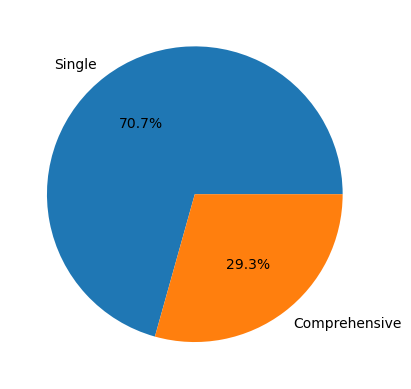

In [40]:
fig, ax = plt.subplots()
ax.pie(count_int_EC, labels=eng_ind_EC, autopct='%1.1f%%')
plt.show()

## Park_Above & Park_Below

In [48]:
Park_Above = df['Park_Above']
Park_Below = df['Park_Below']
print(f"There are {Park_Above.isnull().sum()} null values, and they are located at \n{np.where(Park_Above.isnull())[0]}")
print(f"There are {Park_Below.isnull().sum()} null values, and they are located at \n{np.where(Park_Below.isnull())[0]}")

There are 1 null values, and they are located at 
[54]
There are 1 null values, and they are located at 
[54]


In [49]:
Park_Above = Park_Above.dropna().astype('int16')
Park_Below = Park_Below.dropna().astype('int16')
display(Park_Above)
display(Park_Below)

0      13
1       0
2     270
3       0
4       0
     ... 
88     43
89     16
90      4
91    159
92    304
Name: Park_Above, Length: 92, dtype: int16

0      426
1      215
2      178
3      337
4     1208
      ... 
88     143
89     114
90      97
91    1457
92      44
Name: Park_Below, Length: 92, dtype: int16

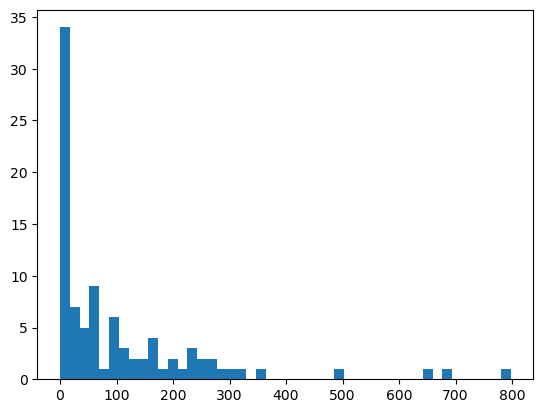

In [79]:
fig, ax = plt.subplots()
b = int(len(Park_Above)/2)
ax.hist(Park_Above, bins = b)
plt.show()

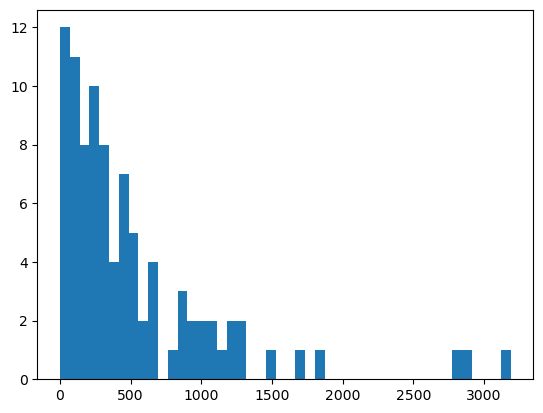

In [80]:
fig, ax = plt.subplots()
b = int(len(Park_Below)/2)
ax.hist(Park_Below, bins = b)
plt.show()

In [52]:
Park_Above.describe()

count     92.000000
mean     104.434783
std      150.712032
min        0.000000
25%        3.500000
50%       50.000000
75%      151.750000
max      798.000000
Name: Park_Above, dtype: float64

In [53]:
Park_Below.describe()

count      92.000000
mean      521.880435
std       607.353362
min         0.000000
25%       139.500000
50%       335.000000
75%       666.750000
max      3190.000000
Name: Park_Below, dtype: float64

In [54]:
printApt(Park_Above, df, dfInfo)

kaptCode           A13086705
bjdCode           1123010700
Household_Num           1089
Begin_Date          19780927
Heating_Method          중앙난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                20.0
Park_Above             798.0
Park_Below               0.0
Name: 57, dtype: object
     kaptCode Complex_Name
67  A13086705        청량리미주


In [55]:
printApt(Park_Below, df, dfInfo)

kaptCode           A13003007
bjdCode           1123010500
Household_Num           2652
Begin_Date          20141013
Heating_Method          개별난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                83.0
Park_Above               0.0
Park_Below            3190.0
Name: 42, dtype: object
     kaptCode Complex_Name
46  A13003007        래미안위브
